<a href="https://colab.research.google.com/github/shaikhalid/TrueAI/blob/master/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***RL PLAYGROUND***

```
# Aim to build co-ordianting agents to achieve a pre-defined goal
```



In [2]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 27kB/s 
     |████████████████████████████████| 8.8MB 18.7MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [1]:
!python -m pip install 'pillow<6.2.2'

In [0]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image


In [0]:
SIZE = 28
COLOR_CODE = {
    "agent":[0,0,255],
    "enemy":[255,0,0],
    "destination":[0,255,0]
}


---
1.   Environment has Agents
2.   Agents take Actions
---


In [0]:
#gen 1 agent
class Agent0:
    def __init__(self, pos):
        self.pos = pos
        #actions
        self.actions = ['L', 'R', 'U', 'D']
        
    def take_action(self, action):
        if(action == self.actions[0]):
            self.pos['y'] += -1
        elif(action == self.actions[1]):
            self.pos['y'] += 1
        elif(action == self.actions[2]):
            self.pos['x'] += -1
        elif(action == self.actions[3]):
            self.pos['x'] += 1
        return
        

In [0]:
#environment
class Env:  
    def __init__(self):
        #pos of all 
        self.agent = Agent0({'x':0, 'y':0})
        self.enemy_pos = {'x':13, 'y':13} #for gen1 static enemy and destination
        self.destination_pos = {'x':27, 'y':27}
       
    def get_state(self):
        return((self.enemy_pos, self.agent.pos, self.destination_pos))

    def render(self):
        self.data = np.zeros((SIZE, SIZE, 3), dtype=np.uint8)# a 3 color channel 28x28 matrix for redering
        self.data[self.agent.pos['x'], self.agent.pos['y']] = COLOR_CODE['agent']# pos of agent
        self.data[self.enemy_pos['x'], self.enemy_pos['y']] = COLOR_CODE['enemy']# pos of enemy
        self.data[self.destination_pos['x'], self.destination_pos['y']] = COLOR_CODE['destination']# pos of destination

        img = Image.fromarray(self.data, 'RGB')# pillow image library
        plt.imshow(img)
        return

    def step(self, action):
        reward = 0
        self.agent.take_action(action)
        state = self.get_state()
        return(state, reward)

    def reset():
        return
    
    


In [0]:
env = Env()

(({'x': 13, 'y': 13}, {'x': 0, 'y': -1}, {'x': 27, 'y': 27}), 0)


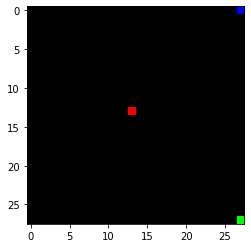

In [72]:
env.render()
print(env.step('L'))
env.render()